# Banana Leaf Disease Detection and Classification

## Import necessary libraries

In [1]:
import os
import cv2 
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, preprocessing  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

print("Tensorflow version: ",tf.__version__)
sklearn.show_versions()

Tensorflow version:  2.4.1

System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Muhammad Talha\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


## Data Preprocessing

In [2]:
def Img_preprocessing(n):
    
    #step-1: Convert rgb to grayscale
    gray_scale=cv2.cvtColor(n, cv2.COLOR_BGR2GRAY )
    
    
    #step-2: Resize the image-----------------
    img_size=200
    resized_img=cv2.resize(gray_scale,(img_size,img_size)) #resize your image so your all images will have same size
    
    #step-3:do histogram equalisation to increase contrast of an image-------------
    equ = cv2.equalizeHist(resized_img)
    
    
    #step-4:remove noise :using gaussian blur----------------(for smoothing the image)
    #blur=cv2.GaussianBlur(equ,(5,5),0)
    blur=cv2.medianBlur(equ,5)
    
    #step-5: Image segmentation for edge detection-------------
    #edges = cv2.Canny(equ,100,200) 
    #edges = cv2.Laplacian(equ, cv2.CV_16S, ksize=3)
    grad_x = cv2.Sobel(blur, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(blur, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)   #sobel derivative
    
    clean_data =edges
    return clean_data




dir1="C:\\Users\\Muhammad Talha\\Downloads"
catg=['bbw','bbs','healthy']

img_cube=[]
image_size=800

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir1,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) #convert rgb image to gray scale image
        final_data=Img_preprocessing(img_arr)
        img_cube.append([final_data,label])
print("Length of your dataset: ",len(img_cube))
print("Whole image data in array format:\n",img_cube[10])

Length of your dataset:  623
Whole image data in array format:
 [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]


0

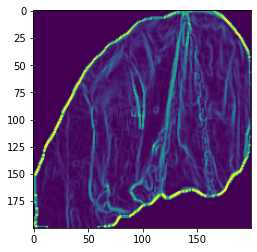

In [3]:
plt.imshow(img_cube[3][0])
img_cube[3][1]

2

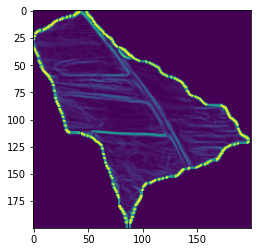

In [4]:
plt.imshow(img_cube[350][0])
img_cube[350][1]

In [5]:
img_cube[350][0].shape

(200, 200)

2

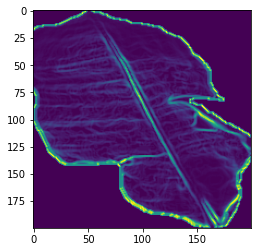

In [6]:
plt.imshow(img_cube[500][0])
img_cube[500][1]

In [7]:
#now i am trying to shuffle the data 
random.shuffle(img_cube)

## Classifier implementation

In [8]:
from sklearn.svm import SVC

dir2="C:\\Users\\Muhammad Talha\\Downloads"
catg=['bbw','bbs','healthy']

img_cube2=[]
image_size=500

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir2,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j))
        #gray_scale=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        resized_img=cv2.resize(img_arr,(200,200))
        img_cube2.append([resized_img,label])

random.shuffle(img_cube2)

feature2=[]
target2=[]
for i in img_cube2:
    flat=i[0].flatten()
    feature2.append(flat)
for i in img_cube2:
    target2.append(i[1])
    
#len(feature2),len(target2)
feature2 = np.array(feature2)/ 255.0

x_train2,x_test2,y_train2,y_test2=train_test_split(feature2,target2,test_size=0.25,random_state=42)

clf1=SVC().fit(x_train2,y_train2)
y_pred2=clf1.predict(x_test2)


print(accuracy_score(y_test2,y_pred2)*100)


82.05128205128204


## Evaluation Matrix

              precision    recall  f1-score   support

         BBW       0.81      0.71      0.76        59
         BSD       0.00      0.00      0.00         7
     Healthy       0.83      0.96      0.89        90

    accuracy                           0.82       156
   macro avg       0.54      0.56      0.55       156
weighted avg       0.78      0.82      0.80       156



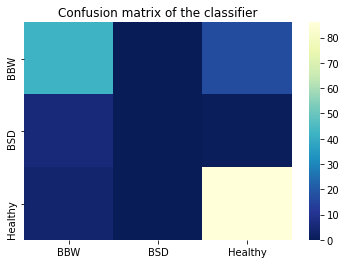

In [10]:
import warnings
warnings.filterwarnings('ignore')

labels={0:'BBW',1:'BSD',2:'Healthy'}
plt.title('Confusion matrix of the classifier')
sns.heatmap(confusion_matrix(y_test2,y_pred2,),cmap="YlGnBu_r", xticklabels=['BBW', 'BSD','Healthy'],yticklabels=['BBW', 'BSD','Healthy'])

confusion_matrix(y_test2,y_pred2 )
from sklearn.metrics import classification_report
k=classification_report(y_test2,y_pred2,target_names=['BBW', 'BSD','Healthy'])
print(k)

# Extract the Data

In [11]:
dir1="C:\\Users\\Muhammad Talha\\Downloads"
catg=['bbw','bbs','healthy']

img_cube3=[]
#image_size=800

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir1,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) #convert rgb image to gray scale image
        #gray_img=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        final_data=cv2.resize(img_arr,(100,100))
        img_cube3.append([final_data,label])
        
img_cube3[10]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

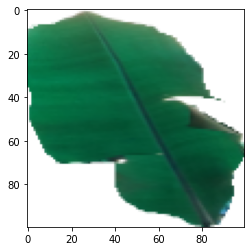

In [12]:
feat3=[]
tar3=[]
for i,j in img_cube3:
    feat3.append(i)
    tar3.append(j)
x=np.array(feat3)
x=x/255.0 #as scaling the values between 0 to 1 becuz lesser the values faster will be the calculation
y=np.array(tar3)
plt.imshow(x[500],cmap='gray')

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)
x_train.shape

(436, 100, 100, 3)

In [14]:
y_test.shape,y_train.shape

((187,), (436,))

In [15]:
x_train.dtype,y_train.dtype

(dtype('float64'), dtype('int32'))

# Train Neural network model

In [16]:
cnn2= models.Sequential()
Conv2D = layers.Conv2D
MaxPooling2D = layers.MaxPooling2D
Flatten = layers.Flatten
Dense = layers.Dense

#convolutional layer-1
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-2
cnn2.add(Conv2D(64, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-3
cnn2.add(Conv2D(128, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))


#convolutional layer-4
cnn2.add(Conv2D(256, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))


#flatten layer
cnn2.add(Flatten(input_shape=x_train.shape[1:] ))


cnn2.add(Dense(256,activation='relu'))

#densly connected layer
cnn2.add(Dense(128,activation='relu'))

#output layer
cnn2.add(Dense(3,activation='softmax'))


cnn2.compile(optimizer='Adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#logit=true when we not use any normalization for last layer that means if we don't apply any act. fun then keep logit=true0----
#with RMSPROP got 74-72%
#SGD found 57%



history2=cnn2.fit(  x_train,
          y_train,
          verbose=1,
          epochs=200,  #20
          batch_size=32,  #15
          validation_data=(x_test,y_test) )

Epoch 1/200
14/14 [==============================] - 15s 960ms/step - loss: 1.0836 - accuracy: 0.4144 - val_loss: 1.0345 - val_accuracy: 0.5829
Epoch 2/200
14/14 [==============================] - 11s 821ms/step - loss: 1.0255 - accuracy: 0.5507 - val_loss: 0.9810 - val_accuracy: 0.5829
Epoch 3/200
14/14 [==============================] - 11s 814ms/step - loss: 0.9667 - accuracy: 0.5961 - val_loss: 0.9302 - val_accuracy: 0.5829
Epoch 4/200
14/14 [==============================] - 13s 915ms/step - loss: 0.9204 - accuracy: 0.5915 - val_loss: 0.8871 - val_accuracy: 0.5829
Epoch 5/200
14/14 [==============================] - 12s 902ms/step - loss: 0.9048 - accuracy: 0.5586 - val_loss: 0.8593 - val_accuracy: 0.5829
Epoch 6/200
14/14 [==============================] - 12s 855ms/step - loss: 0.8412 - accuracy: 0.6119 - val_loss: 0.8456 - val_accuracy: 0.5829
Epoch 7/200
14/14 [==============================] - 13s 957ms/step - loss: 0.8354 - accuracy: 0.5957 - val_loss: 0.8362 - val_accuracy:

Epoch 58/200
14/14 [==============================] - 9s 619ms/step - loss: 0.6103 - accuracy: 0.7797 - val_loss: 0.6411 - val_accuracy: 0.7273
Epoch 59/200
14/14 [==============================] - 9s 616ms/step - loss: 0.6410 - accuracy: 0.7178 - val_loss: 0.6015 - val_accuracy: 0.7273
Epoch 60/200
14/14 [==============================] - 9s 657ms/step - loss: 0.5680 - accuracy: 0.7685 - val_loss: 0.6209 - val_accuracy: 0.7273
Epoch 61/200
14/14 [==============================] - 9s 653ms/step - loss: 0.5807 - accuracy: 0.7738 - val_loss: 0.5737 - val_accuracy: 0.7487
Epoch 62/200
14/14 [==============================] - 9s 605ms/step - loss: 0.5233 - accuracy: 0.8051 - val_loss: 0.5741 - val_accuracy: 0.7594
Epoch 63/200
14/14 [==============================] - 8s 589ms/step - loss: 0.5530 - accuracy: 0.7909 - val_loss: 0.5948 - val_accuracy: 0.7807
Epoch 64/200
14/14 [==============================] - 9s 654ms/step - loss: 0.6058 - accuracy: 0.7479 - val_loss: 0.5744 - val_accuracy:

Epoch 115/200
14/14 [==============================] - 9s 642ms/step - loss: 0.3752 - accuracy: 0.8613 - val_loss: 0.4949 - val_accuracy: 0.7968
Epoch 116/200
14/14 [==============================] - 10s 685ms/step - loss: 0.4226 - accuracy: 0.8434 - val_loss: 0.5012 - val_accuracy: 0.7754
Epoch 117/200
14/14 [==============================] - 10s 685ms/step - loss: 0.4223 - accuracy: 0.8516 - val_loss: 0.4949 - val_accuracy: 0.7861
Epoch 118/200
14/14 [==============================] - 9s 668ms/step - loss: 0.4315 - accuracy: 0.8318 - val_loss: 0.4935 - val_accuracy: 0.8182
Epoch 119/200
14/14 [==============================] - 10s 700ms/step - loss: 0.3964 - accuracy: 0.8650 - val_loss: 0.4965 - val_accuracy: 0.8182
Epoch 120/200
14/14 [==============================] - 8s 567ms/step - loss: 0.4501 - accuracy: 0.8126 - val_loss: 0.5322 - val_accuracy: 0.7807
Epoch 121/200
14/14 [==============================] - 8s 591ms/step - loss: 0.4374 - accuracy: 0.8378 - val_loss: 0.5351 - val

14/14 [==============================] - 9s 664ms/step - loss: 0.3186 - accuracy: 0.8826 - val_loss: 0.4966 - val_accuracy: 0.8075
Epoch 172/200
14/14 [==============================] - 9s 637ms/step - loss: 0.2962 - accuracy: 0.8843 - val_loss: 0.5144 - val_accuracy: 0.7754
Epoch 173/200
14/14 [==============================] - 8s 571ms/step - loss: 0.3554 - accuracy: 0.8660 - val_loss: 0.4817 - val_accuracy: 0.8128
Epoch 174/200
14/14 [==============================] - 8s 544ms/step - loss: 0.3067 - accuracy: 0.8858 - val_loss: 0.5513 - val_accuracy: 0.7754
Epoch 175/200
14/14 [==============================] - 8s 551ms/step - loss: 0.3311 - accuracy: 0.8841 - val_loss: 0.4889 - val_accuracy: 0.8075
Epoch 176/200
14/14 [==============================] - 8s 545ms/step - loss: 0.3633 - accuracy: 0.8624 - val_loss: 0.4858 - val_accuracy: 0.8128
Epoch 177/200
14/14 [==============================] - 9s 640ms/step - loss: 0.3019 - accuracy: 0.8912 - val_loss: 0.4760 - val_accuracy: 0.8182

# Observation

In [17]:
# Evaluating the Predictions on the Model

score = cnn2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.47584885358810425
Test accuracy: 0.8128342032432556


In [18]:
y_pred=[]
for i in range(len(x_test)):
        y_pred.append(cnn2.predict(x_test[i].reshape(1,100,100,3)))
        
len(y_test),len(y_pred)

(187, 187)

In [19]:
y_pred[:10]  #to get max probability value we use argmax

[array([[0.17285308, 0.211382  , 0.615765  ]], dtype=float32),
 array([[0.16796921, 0.03573809, 0.79629266]], dtype=float32),
 array([[0.4203187 , 0.13990867, 0.43977267]], dtype=float32),
 array([[0.0203534 , 0.00407673, 0.97556984]], dtype=float32),
 array([[0.0157623 , 0.0231373 , 0.96110034]], dtype=float32),
 array([[0.89623296, 0.09041803, 0.01334906]], dtype=float32),
 array([[0.81863105, 0.17762221, 0.0037467 ]], dtype=float32),
 array([[0.21447289, 0.05438727, 0.7311398 ]], dtype=float32),
 array([[0.05207679, 0.01243039, 0.9354928 ]], dtype=float32),
 array([[0.7796453 , 0.21449839, 0.00585628]], dtype=float32)]

In [20]:
result=[]
for i in range(len(x_test)):
    result.append(np.argmax(y_pred[i],axis=1)) #it will take index value for which value is maxiumum of that array
result[:10]

[array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([0], dtype=int64)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

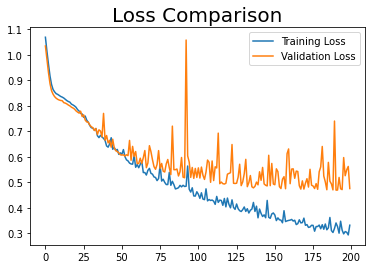

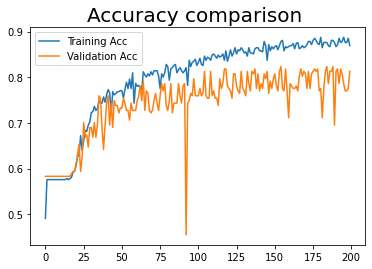

In [21]:
cnn2.summary()


y_pred2=result

print("*-*"*40)
print("Accuracy Found: ",accuracy_score(y_test,np.array(y_pred2)))
#using adam accuracy was 83%
#using adadelta accuracy was 89%
print("*-*"*40)
print("Confusion Matrix:\n",confusion_matrix(y_test,np.array(y_pred2))) 
print("*-*"*40)
print("Classification Report:\n",classification_report(y_test,np.array(y_pred2)))
print("*-*"*40)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [22]:
# Save the model
cnn2.save("BananaLeaf_classifier.h5")

# Model Testing

In [23]:
# Load the model
mymodel = models.load_model("BananaLeaf_classifier.h5")

In [24]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2